<a href="https://apssdc.in"><img src="https://drive.google.com/uc?export=download&id=15AKQ6_-BixW4K6mL6RPphF5EKXqYF2zj" width="800" align="center"></a>

<h1><center> Data Analysis Using Python Day09</h1></center>

## Day Objectives

### Cleaning Data in Python

- Identifying and Eliminating Outliers
    - Outliers are observations that are significantly different from other data points
    - Outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy.
    - Need to use the mathematical formula and retrieve the outlier data.
```
interquartile range(IQR) = Q3(quantile(0.75)) − Q1(quantile(0.25))
```

![BoxPlot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)
- Dropping duplicate data
    - drop_duplicates() - Return DataFrame with duplicate rows removed.

- Filling missing data
    - Mean
    - Median
    - Mode
    - Constant
- Applying on raw dataset and introduction to Kaggle and other data sources

### Data Preprocessing with Scikit-Learn	
- Introduction
- Standardizing Data
- Data Range
- Robust Scaling
- Normalizing Data
- Data Imputation

### [Advertisments Dataset Link](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Advertising.csv)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Advertising.csv", index_col = 0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Effect of Outliers on mean and Median

### Ex: Stock Analysis

In [3]:
import numpy as np
st1 = np.array([5, 5.5, 6, 0.5, 4.5, 5, 6, 5.8])

st2 = np.array([5, 5.5, 6, 5, 4.5, 5, 6, 5.8])

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(200, 4)

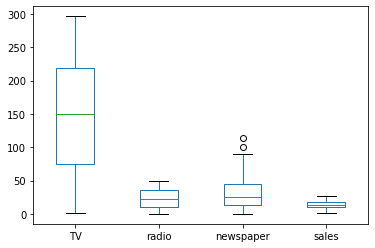

In [6]:
df.plot(kind = 'box')

if data > max (1.5 * IQR + Q3)
if data < min (Q1 - 1.5 IQR)

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

Q1, Q3, IQR

(TV           74.375
 radio         9.975
 newspaper    12.750
 sales        10.375
 Name: 0.25, dtype: float64,
 TV           218.825
 radio         36.525
 newspaper     45.100
 sales         17.400
 Name: 0.75, dtype: float64,
 TV           144.450
 radio         26.550
 newspaper     32.350
 sales          7.025
 dtype: float64)

In [8]:
filtered_data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


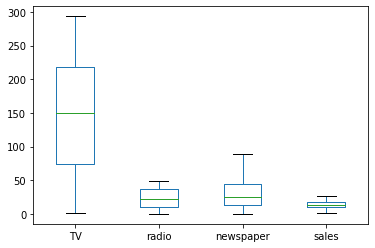

In [9]:
filtered_data.plot(kind = 'box')

### Duplicated Data

In [10]:
dic = {'cusId':[123,456,987,258,258,987], 'CustNo': [852, 654, 654, 852, 852, 654]}


df1 = pd.DataFrame(dic)

df1

,cusId,CustNo
0,123,852
1,456,654
2,987,654
3,258,852
4,258,852
5,987,654


In [11]:
df1.duplicated().sum()

2

In [12]:
df1.drop_duplicates()

,cusId,CustNo
0,123,852
1,456,654
2,987,654
3,258,852


### Data Proprecessing

1. Standardizing Data

$$𝑍 = \frac{(𝑋_𝑖  − 𝑚𝑒𝑎𝑛(𝑋))}{(𝑠𝑡𝑑𝑒𝑣(𝑥))}$$

In [13]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


mean = 0
std = 1

In [15]:
(230.1 - df['TV'].mean())/df['TV'].std()

0.9674245973763037

In [16]:
from sklearn.preprocessing import scale

In [18]:
std_df = scale(df)

In [24]:
print("mean of 1st column is:",std_df[:, 0].mean().round(3),"\nstd of 1st column is:", std_df[:, 0].std().round(3))

mean of 1st column is: 0.0 
std of 1st column is: 1.0


1. Robust Scaler

$$𝑍 = \frac{(𝑋_𝑖  − median(𝑋))}{(𝑠𝑡𝑑𝑒𝑣(𝑥))}$$

In [25]:
from sklearn.preprocessing import RobustScaler

In [27]:
rbs = RobustScaler()

rbs_df = rbs.fit_transform(df)

In [28]:
print("mean of 1st column is:",rbs_df[:, 0].mean().round(3),"\nstd of 1st column is:", rbs_df[:, 0].std().round(3))

mean of 1st column is: -0.019 
std of 1st column is: 0.593


3. Data Range

$$𝑥_𝑃=\frac{𝑥 − 𝑑_{𝑚𝑖𝑛}}{𝑑_{𝑚𝑎𝑥} − 𝑑_{𝑚𝑖𝑛}}$$

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)

In [32]:
print("max of 1st column is:",rbs_df[:, 0].max().round(3),"\nmin of 1st column is:", rbs_df[:, 0].min().round(3))

max of 1st column is: 1.015 
min of 1st column is: -1.032
